In [1]:
import numpy as np

In [2]:
X_test_path="Kannada/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz"
X_train_path="Kannada/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz"
y_test_path="Kannada/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz"
y_train_path="Kannada/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz"

test_path="Kannada/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Dig_MNIST/X_dig_MNIST.npz"

In [3]:
X_test = np.load(X_test_path)['arr_0']
X_train= np.load(X_train_path)['arr_0']
y_test= np.load(y_test_path)['arr_0']
y_train= np.load(y_train_path)['arr_0']


In [4]:
test=np.load(test_path)['arr_0']

test.shape

(10240, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
X_test.shape



(10000, 28, 28)

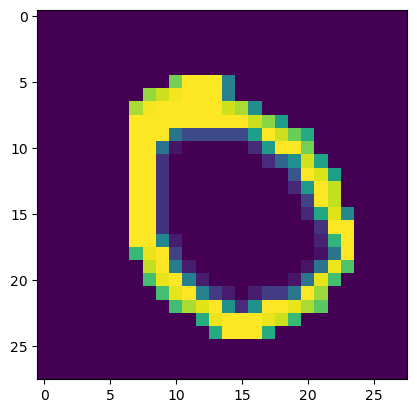

In [7]:
import matplotlib.pyplot as plt

plt.imshow(test[0])

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


2023-11-18 18:43:57.312045: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Create a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes (adjust as needed)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping and Adam optimizer
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1675 - accuracy: 0.9435 - val_loss: 0.1758 - val_accuracy: 0.9436
Epoch 2/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0606 - accuracy: 0.9795 - val_loss: 0.1619 - val_accuracy: 0.9498
Epoch 3/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0432 - accuracy: 0.9858 - val_loss: 0.1778 - val_accuracy: 0.9470
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.1676 - val_accuracy: 0.9512
Epoch 5/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.1845 - val_accuracy: 0.9510
313/313 - 1s - loss: 0.1845 - accuracy: 0.9510 - 646ms/epoch - 2ms/step

Test accuracy: 0.9509999752044678


In [11]:
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.9609999752044678
